# Torch 기초

In [1]:
import torch

<br></br>

## - 예제 : 수식

$~~~\boxed{~y = (x-1)(x-2)(x-3)~}$

$~~~~~\dashrightarrow x=3.5\,$일 때의 $y\,$값은?

<img src="https://github.com/ElaYJ/supplement/assets/153154981/955c1d4d-7d51-4902-afbb-2ac87ec50041" width="57%">

In [7]:
# 일반적인 python code

x = 3.5
y = (x-1)*(x-2)*(x-3)

print(x, '-->', y)

3.5 --> 1.875


In [4]:
# torch code

x = torch.tensor(3.5)
x

tensor(3.5000)

In [52]:
# 자동으로 기울기를 계산하기 위한 준비

x = torch.tensor(3.5, requires_grad=True)
x

tensor(3.5000, requires_grad=True)

In [53]:
y = (x - 1) * (x - 2) * (x - 3)
y

tensor(1.8750, grad_fn=<MulBackward0>)

- 만약 기울기를 알고싶다면...

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/f4feba9d-03d9-42cd-950b-9a507b0cd350" width="57%">

In [54]:
y.backward() #--> 미분식 y'
y

tensor(1.8750, grad_fn=<MulBackward0>)

In [55]:
x.grad

tensor(5.7500)

- 노드가 복잡한 경우 Chain Rule 적용

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/1080b883-e0f9-4640-8d7b-f134290970fe" width="57%">

In [16]:
a = torch.tensor(2.0, requires_grad=True) # a=2
b = torch.tensor(1.0, requires_grad=True) # b=1

x = 2*a + 3*b
y = 5*a**2 + 3*b**3
z = 2*x + 3*y

- $~~\cfrac{dz}{da} = ~?$

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/bb53b628-05ae-483e-a552-791f4b7732b2" width="57%"></br>

	$~~\dashrightarrow~ $ 경로가 2개 존재한다.

In [17]:
# work out gradients (식 미분 수행)

z.backward()

In [18]:
# what is gradient at a=2.0

a.grad

tensor(64.)

<br></br>

## - 예제 : 보스턴 집값 선형회귀

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### ◾ dataset

- Variables in order:

	|col|content|
	|---|---|
	|CRIM | per capita crime rate by town |
	|ZN | proportion of residential land zoned for lots over 25,000 sq.ft. |
	|INDUS | proportion of non-retail business acres per town |
	|CHAS | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
	|NOX | nitric oxides concentration (parts per 10 million) |
	|RM | average number of rooms per dwelling |
	|AGE | proportion of owner-occupied units built prior to 1940 |
	|DIS | weighted distances to five Boston employment centres |
	|RAD | index of accessibility to radial highways |
	|TAX | full-value property-tax rate per \$10,000  |
	|PTRATIO | pupil-teacher ratio by town |
	|B | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
	|LSTAT | % lower status of the population |
	|MEDV | Median value of owner-occupied homes in \$1000's |

In [21]:
url ='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/boston.csv'
boston = pd.read_csv(url)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [23]:
# MEDV --> TARGET

boston.rename(columns={"MEDV": "TARGET"}, inplace=True)
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


#### ◾ import

In [1]:
# 학습에 필요한 모듈 import

import torch
import torch.nn as nn #--> Neural Net
import torch.nn.functional as F #--> NN에서 많이 쓰이는 함수들
import torch.optim as optim #--> 최적화와 관련된 함수들

torch.__version__

'2.2.2'

#### ◾ features & torch data_type

In [25]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

In [26]:
# 학습에 필요한 특성 선택 후 torch가 학습할 수 있는 자료형으로 변환

cols = ['TARGET', 'INDUS', 'RM', 'LSTAT', 'NOX', 'DIS']

data = torch.from_numpy(boston[cols].values).float() #--> ⭐ 토치의 자료형 습관~!!
data.shape

torch.Size([506, 6])

In [27]:
data

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

#### ◾ seperate label

In [28]:
# 특성과 라벨 분리

y = data[:, :1]
X = data[:, 1:]

X.shape, y.shape

(torch.Size([506, 5]), torch.Size([506, 1]))

#### ◾ hyperparameter

In [29]:
# Define configurations

n_epochs = 2000
learning_rate = 1e-3 #--> 0.001
print_interval = 100 #--> 100번째 epoch 마다 상황 출력

#### ◾ model : torch linear class

<img src="https://github.com/ElaYJ/supplement/assets/153154981/73fd394c-eaba-4998-81d3-c29165b07226" width="67%">
<img src="https://github.com/ElaYJ/supplement/assets/153154981/c8d06c35-0aab-4506-8fb7-6fd62ac504b7" width="67%">

In [30]:
# 모델 수립

model = nn.Linear(X.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

In [31]:
X.size(-1)

5

#### ◾ optimizer

In [32]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#### ◾ 학습

- keras와 달리 사용이 조금 복잡해 보일 수는 있으나 개념을 이해하기엔 좋다.

In [33]:
# 학습 시작

for i in range(n_epochs):
    y_hat = model(X)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print("Epoch %d: loss=%.4e" % (i+1, loss))

Epoch 100: loss=4.2665e+01
Epoch 200: loss=3.6635e+01
Epoch 300: loss=3.3301e+01
Epoch 400: loss=3.1422e+01
Epoch 500: loss=3.0363e+01
Epoch 600: loss=2.9765e+01
Epoch 700: loss=2.9429e+01
Epoch 800: loss=2.9238e+01
Epoch 900: loss=2.9131e+01
Epoch 1000: loss=2.9070e+01
Epoch 1100: loss=2.9035e+01
Epoch 1200: loss=2.9015e+01
Epoch 1300: loss=2.9004e+01
Epoch 1400: loss=2.8997e+01
Epoch 1500: loss=2.8993e+01
Epoch 1600: loss=2.8990e+01
Epoch 1700: loss=2.8989e+01
Epoch 1800: loss=2.8987e+01
Epoch 1900: loss=2.8986e+01
Epoch 2000: loss=2.8985e+01


In [34]:
# 학습 결과 정리

df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=["y", "y_hat"])
df

,y,y_hat
0,24.000000,30.307653
1,21.600000,25.309431
2,34.700001,32.550381
3,33.400002,32.407719
4,36.200001,31.771662
...,...,...
501,22.400000,26.767416
502,20.600000,24.691433
503,23.900000,31.507986
504,22.000000,29.852848


c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


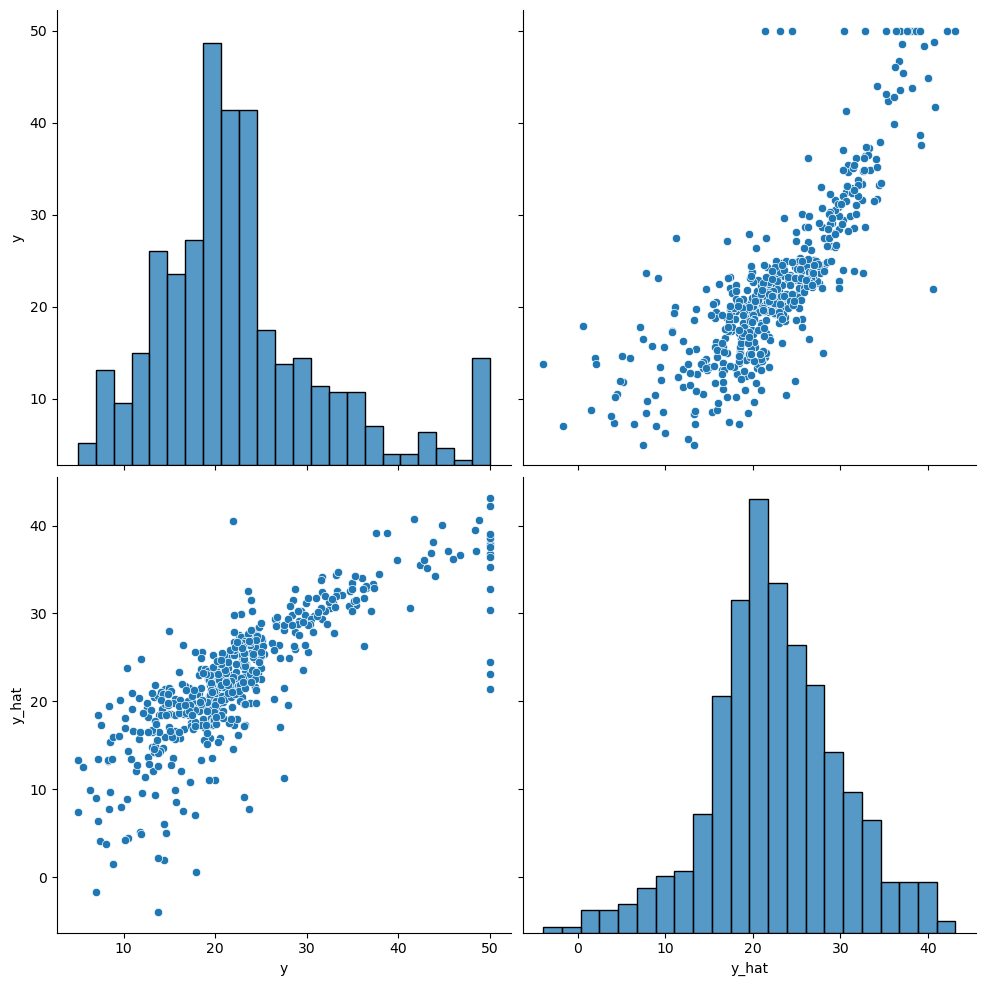

In [35]:
sns.pairplot(df, height=5)
plt.show()
#--> 참값 y의 분포 & 예측값 y_hat의 분포

<br></br>

## - 예제. 유방암 진단 예측 이진분류

</br>

#### ◾ dataset

<img src="https://github.com/ElaYJ/supplement/assets/153154981/404580a9-e0f4-4093-b7c1-a995eb541008" width="37%">

In [36]:
from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [37]:
bcancel_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
bcancel_df['class'] = b_cancer.target
bcancel_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


#### ◾ features

In [38]:
bcancel_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

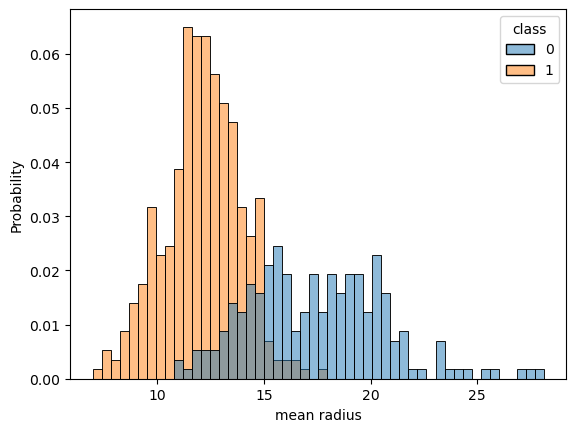

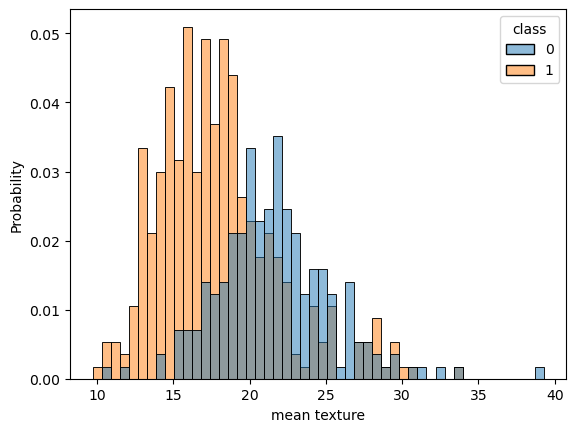

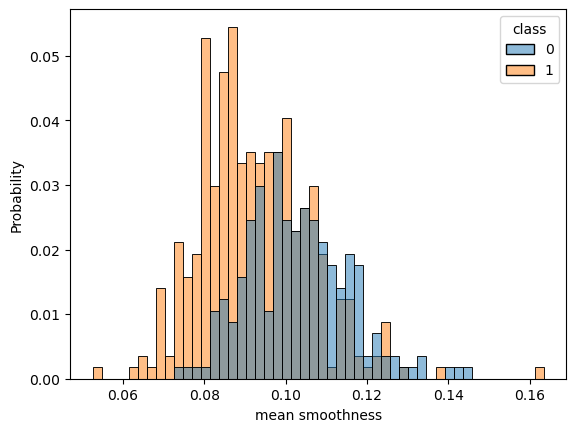

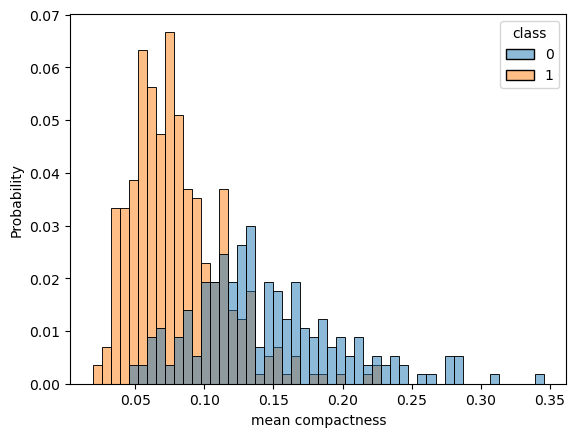

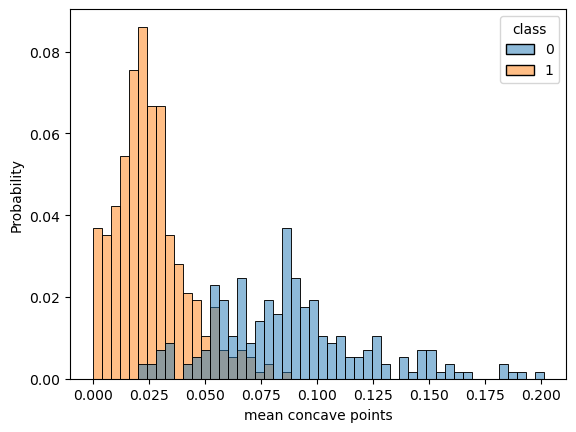

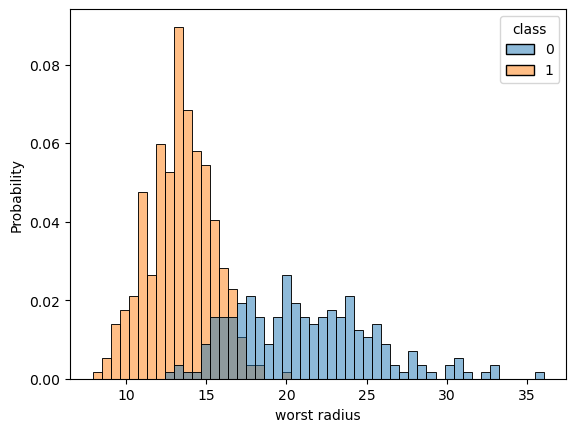

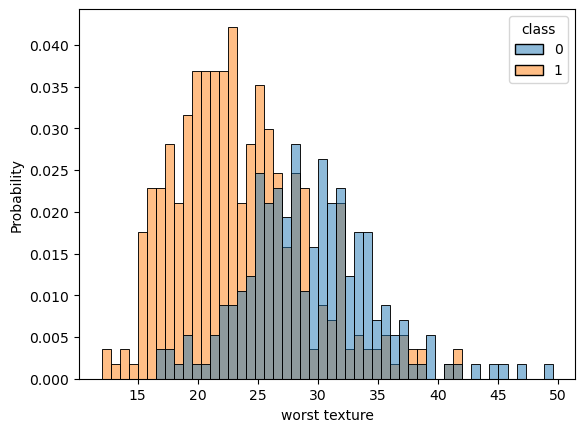

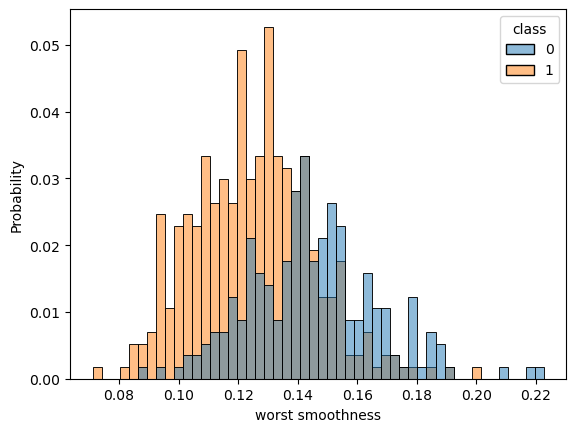

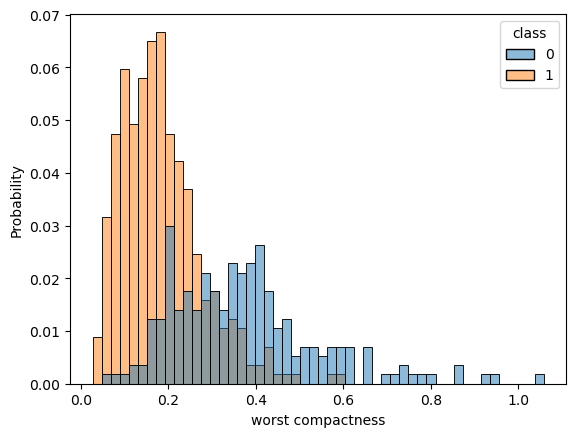

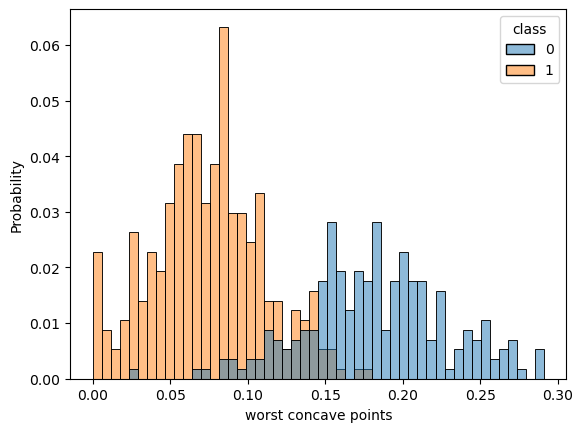

In [40]:
# 관심있는 컬럼 정리 & 확인

cols = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concave points',
        'worst radius', 'worst texture', 'worst smoothness', 'worst compactness', 'worst concave points',
        'class']

for c in cols[:-1]:
    sns.histplot(bcancel_df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

#### ◾ torch setting

In [41]:
data = torch.from_numpy(bcancel_df[cols].values).float()
data.shape

torch.Size([569, 11])

In [42]:
# 데이터를 특성과 라벨로 분리

X = data[:, :-1]
y = data[:, -1:]

X.shape, y.shape

(torch.Size([569, 10]), torch.Size([569, 1]))

In [43]:
# 하이퍼파라미터 설정
# Define configurations

n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

#### ◾ class model

In [44]:
class MyModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        super().__init__() #--> 상속하는 nn.Module의 초기화 함수 호출함으로써 Module의 속성을 상속받는다.
        
        self.linear = nn.Linear(input_dim, output_dim)
        self.act_func = nn.Sigmoid() #--> 2진 분류이므로 출력단은 시그모이드 함수
        
    def forward(self, x):
        # |x| = (batch_size, input_dim)
        # |y| = (batch_size, output_dim)
        y = self.act_func(self.linear(x))
        
        return y

In [45]:
model = MyModel(input_dim=X.size(-1), output_dim=y.size(-1))

# Define BCELoss(Binary Cross Entropy) instead of MSELoss
crit = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#### ◾ 학습

In [46]:
# 학습 시작

for i in range(n_epochs):
    y_hat = model(X)
    loss = crit(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print("Epoch %d: loss=%.4e" % (i+1, loss))

Epoch 10000: loss=2.7497e-01
Epoch 20000: loss=2.2731e-01
Epoch 30000: loss=1.9876e-01
Epoch 40000: loss=1.8007e-01
Epoch 50000: loss=1.6698e-01
Epoch 60000: loss=1.5733e-01
Epoch 70000: loss=1.4992e-01
Epoch 80000: loss=1.4405e-01
Epoch 90000: loss=1.3928e-01
Epoch 100000: loss=1.3533e-01
Epoch 110000: loss=1.3199e-01
Epoch 120000: loss=1.2913e-01
Epoch 130000: loss=1.2666e-01
Epoch 140000: loss=1.2449e-01
Epoch 150000: loss=1.2258e-01
Epoch 160000: loss=1.2088e-01
Epoch 170000: loss=1.1935e-01
Epoch 180000: loss=1.1797e-01
Epoch 190000: loss=1.1672e-01
Epoch 200000: loss=1.1557e-01


In [48]:
y.size(0), y.size(-1)

(569, 1)

In [49]:
# Accuracy 계산

correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f' % (correct_cnt/total_cnt))

Accuracy: 0.9666


In [50]:
# 예측값의 분포 확인

df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=["y", "y_hat"])
df

,y,y_hat
0,0.0,3.396872e-06
1,0.0,9.663418e-04
2,0.0,5.983080e-04
3,0.0,1.534838e-02
4,0.0,8.521080e-02
...,...,...
564,0.0,4.969711e-04
565,0.0,8.209985e-04
566,0.0,4.554290e-02
567,0.0,8.927308e-07


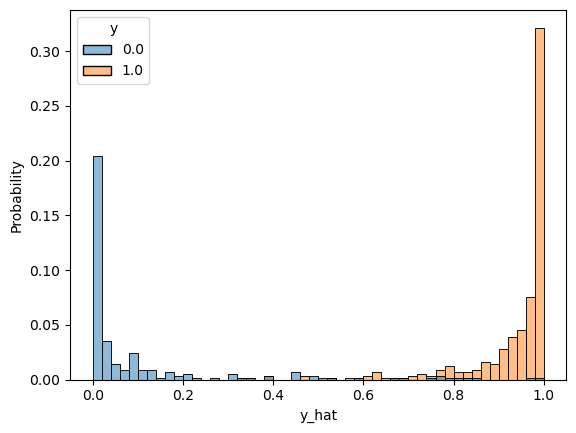

In [51]:
sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show() #--> 예측값 y_hat의 분포